# TODO
## add interpretation

In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [2]:
label_dict = {"e": "Skills and Hobbies",
              "h": "Miscellaneous: Government Documents",
              "k":  "Fiction: General",
              "n": "Fiction: Adventure",
              "p": "Fiction: Romance"}

In [3]:
def read(path):
    corpus=[]
    labels = []
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        with open(filepath, 'r') as i:
            # read content and remove newline char
            s = i.read().replace("\n","")
            corpus.append(s)
            labels.append(file[1])
    print(f"length corpus: {len(corpus)}")
    return corpus, labels

### a) Perform SVD with k = 2 on the training data and plot the first two dimensions of the latent document matrix U. Briefly describe what you observe.


length corpus: 95
Explained variance ratio: [0.08325744 0.21933445]
Singular values: [1849.29221369  468.82074881]
Topic Doc 1: Skills and Hobbies
Topic Doc 2: Skills and Hobbies


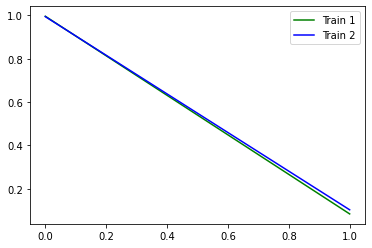

In [4]:
X_train, y_train = read("./HW-10-data/training")
vectorizer = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
svd = TruncatedSVD(n_components=2,n_iter=50, random_state=42)
normalizer = Normalizer(copy = False)

lsa = make_pipeline(vectorizer,svd, normalizer)
X_SVD = lsa.fit_transform(X_train)
print(f"Explained variance ratio: {svd.explained_variance_ratio_}")
print(f"Singular values: {svd.singular_values_}")
X_SVD.shape
fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'g', label='Train 1')
ax.plot(X_SVD[1], 'b', label='Train 2')
ax.legend()
print(f"Topic Doc 1: {label_dict[y_train[0]]}")
print(f"Topic Doc 2: {label_dict[y_train[1]]}")

### Load the test data, transform the documents into the latent vector space of the training model from a) and plot the resulting data into the same figure as a) but make sure they are distinguishable.


length corpus: 50
Topic Train 1: Skills and Hobbies
Topic Train 2: Skills and Hobbies
Topic Test 1: Skills and Hobbies
Topic Test 2: Skills and Hobbies


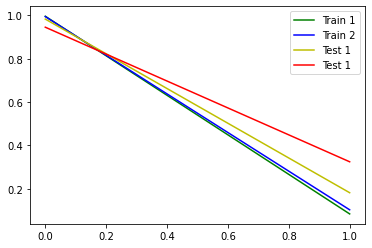

In [5]:
X_test, y_test = read("./HW-10-data/test")
X_SVD_test = lsa.transform(X_test)

fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'g', label='Train 1')
ax.plot(X_SVD[1], 'b', label='Train 2')
ax.plot(X_SVD_test[0], 'y', label="Test 1")
ax.plot(X_SVD_test[1], 'r', label="Test 1")
ax.legend()

print(f"Topic Train 1: {label_dict[y_train[0]]}")
print(f"Topic Train 2: {label_dict[y_train[1]]}")
print(f"Topic Test 1: {label_dict[y_test[0]]}")
print(f"Topic Test 2: {label_dict[y_test[1]]}")

### Remove stopwords using a stopword list (this list can be found in the file stopwords.txt). Run again SVD and plot the training and test documents. Briefly describe differences to the plot in 1b)

In [6]:
def read_stopwords():
    p = "./HW-10-data/stopwords.txt"
    with open(p) as file:
        return file.read().split("\n")
stopwords = read_stopwords()

length corpus: 95


C:\Users\fmeyer\Anaconda3\envs\smolt\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic Doc 1: Skills and Hobbies
Topic Doc 2: Skills and Hobbies


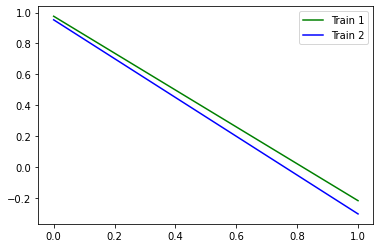

In [7]:
X_train, y_train = read("./HW-10-data/training")
vectorizer2 = CountVectorizer(lowercase =True, stop_words=stopwords, max_df=1.0, min_df=1)
svd2 = TruncatedSVD(n_components=2,n_iter=50, random_state=42)
normalizer2 = Normalizer(copy = False)
lsa2 = make_pipeline(vectorizer2,svd2, normalizer2)
X_SVD2 = lsa2.fit_transform(X_train)
X_SVD2.shape
fig, ax = plt.subplots()
ax.plot(X_SVD2[0], 'g', label='Train 1')
ax.plot(X_SVD2[1], 'b', label='Train 2')
ax.legend()
print(f"Topic Doc 1: {label_dict[y_train[0]]}")
print(f"Topic Doc 2: {label_dict[y_train[1]]}")

length corpus: 50
Topic Train 1: Skills and Hobbies
Topic Train 2: Skills and Hobbies
Topic Test 1: Skills and Hobbies
Topic Test 2: Skills and Hobbies


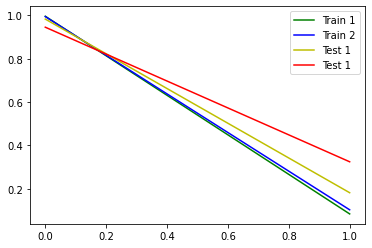

In [8]:
X_test, y_test = read("./HW-10-data/test")

X_SVD_test = lsa.transform(X_test)

fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'g', label='Train 1')
ax.plot(X_SVD[1], 'b', label='Train 2')
ax.plot(X_SVD_test[0], 'y', label="Test 1")
ax.plot(X_SVD_test[1], 'r', label="Test 1")
ax.legend()

print(f"Topic Train 1: {label_dict[y_train[0]]}")
print(f"Topic Train 2: {label_dict[y_train[1]]}")
print(f"Topic Test 1: {label_dict[y_test[0]]}")
print(f"Topic Test 2: {label_dict[y_test[1]]}")

### 2

In [59]:
def get_n_most_likely_words(vocab, lda_model, n=100):
    res =  {}
    for i, topic in enumerate(lda_model.components_):
        topic_dict = {}
        # get position of n highest values
        positions = topic.argsort()[-n:][::-1]
        # get words for n highest positions
        words = [vocab[i] for i in positions]
        res[i] = words
    return res
        # use for evaluation
        #for e, position in enumerate(positions):
        #    # create in json format
        #    topic_dict[e] = {words[e]: round(topic[position], 2)}
            #print(f"{e}: {words[e]}: {topic[position]}")
        #res[i] = topic_dict
    #return res
# TODO put results into dicts and merge them to get evolution of topics

def get_compact(history):
    res = {}
    # for every run
    for r, run in enumerate(history.keys()):
        
        # take each topic
        for topic in history[run].keys():
            try:
                res[topic].append(history[run][topic])
            except KeyError:
                res[topic] = [history[run][topic]]
    return res
def calc_overlap(compact_history):
    for topic in compact_history.keys():
        print(f"Topic {topic}:")
        for i in range(len(compact_history[topic])-1):
            over = overlap(compact_history[topic][i], compact_history[topic][i+1])
            print(f"Overlap run {i} to run {i+1}: {over} ({over /len(compact_history[topic][i])} %)")


In [97]:
from sklearn.decomposition import LatentDirichletAllocation

X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer3 = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
X = vectorizer3.fit_transform(X_train)
lda = LatentDirichletAllocation(n_components=1, random_state=42, n_jobs=-1)
lda.fit(X)
vocab = {v: k for k, v in vectorizer3.vocabulary_.items()}
print(get_n_most_likely_words(vocab, lda, n=100))

length corpus: 95
{0: ['the', 'and', 'of', 'to', 'in', 'he', 'was', 'it', 'that', 'for', 'his', 'with', 'on', 'had', 'is', 'you', 'be', 'as', 'at', 'she', 'her', 'this', 'but', 'him', 'they', 'from', 'or', 'not', 'by', 'have', 'would', 'one', 'all', 'were', 'are', 'there', 'out', 'an', 'said', 'when', 'we', 'their', 'which', 'no', 'up', 'if', 'what', 'so', 'them', 'could', 'about', 'been', 'into', 'me', 'like', 'my', 'can', 'will', 'time', 'more', 'its', 'now', 'then', 'only', 'do', 'who', 'other', 'over', 'two', 'any', 'man', 'down', 'back', 'your', 'state', 'has', 'than', 'did', 'made', 'such', 'long', 'before', 'just', 'new', 'some', 'our', 'these', 'way', 'first', 'little', 'where', 'through', 'get', 'must', 'here', 'how', 'after', 'even', 'well', 'may']}


In [98]:
from sklearn.decomposition import LatentDirichletAllocation
X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer4 = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
X = vectorizer4.fit_transform(X_train)
vocab = {v: k for k, v in vectorizer4.vocabulary_.items()}
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, max_iter=20)
results = {}
for i in range(1,11):
    print(f"Running iter {i * lda.max_iter}")
    lda.fit(X)
    results[i] = get_n_most_likely_words(vocab, lda, 100)
        
compact = get_compact(results)       
calc_overlap(compact)


length corpus: 95
Running iter 20
Running iter 40
Running iter 60
Running iter 80
Running iter 100
Running iter 120
Running iter 140
Running iter 160
Running iter 180
Running iter 200
Topic 0:
Overlap run 0 to run 1: 100 (1.0 %)
Overlap run 1 to run 2: 100 (1.0 %)
Overlap run 2 to run 3: 100 (1.0 %)
Overlap run 3 to run 4: 100 (1.0 %)
Overlap run 4 to run 5: 100 (1.0 %)
Overlap run 5 to run 6: 100 (1.0 %)
Overlap run 6 to run 7: 100 (1.0 %)
Overlap run 7 to run 8: 100 (1.0 %)
Overlap run 8 to run 9: 100 (1.0 %)
Topic 1:
Overlap run 0 to run 1: 100 (1.0 %)
Overlap run 1 to run 2: 100 (1.0 %)
Overlap run 2 to run 3: 100 (1.0 %)
Overlap run 3 to run 4: 100 (1.0 %)
Overlap run 4 to run 5: 100 (1.0 %)
Overlap run 5 to run 6: 100 (1.0 %)
Overlap run 6 to run 7: 100 (1.0 %)
Overlap run 7 to run 8: 100 (1.0 %)
Overlap run 8 to run 9: 100 (1.0 %)
Topic 2:
Overlap run 0 to run 1: 100 (1.0 %)
Overlap run 1 to run 2: 100 (1.0 %)
Overlap run 2 to run 3: 100 (1.0 %)
Overlap run 3 to run 4: 100 (1.0 

In [99]:
from sklearn.decomposition import LatentDirichletAllocation
X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer4 = CountVectorizer(lowercase =True, stop_words=stopwords, max_df=1.0, min_df=1)
X = vectorizer4.fit_transform(X_train)
vocab = {v: k for k, v in vectorizer4.vocabulary_.items()}
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, max_iter=20)
results = {}
for i in range(1,11):
    print(f"Running iter {i * lda.max_iter}")
    lda.fit(X)
    results[i] = get_n_most_likely_words(vocab, lda, 100)
        
compact = get_compact(results)       
calc_overlap(compact)


length corpus: 95
Running iter 20


C:\Users\fmeyer\Anaconda3\envs\smolt\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Running iter 40
Running iter 60
Running iter 80
Running iter 100
Running iter 120
Running iter 140
Running iter 160
Running iter 180
Running iter 200
Topic 0:
Overlap run 0 to run 1: 100 (1.0 %)
Overlap run 1 to run 2: 100 (1.0 %)
Overlap run 2 to run 3: 100 (1.0 %)
Overlap run 3 to run 4: 100 (1.0 %)
Overlap run 4 to run 5: 100 (1.0 %)
Overlap run 5 to run 6: 100 (1.0 %)
Overlap run 6 to run 7: 100 (1.0 %)
Overlap run 7 to run 8: 100 (1.0 %)
Overlap run 8 to run 9: 100 (1.0 %)
Topic 1:
Overlap run 0 to run 1: 100 (1.0 %)
Overlap run 1 to run 2: 100 (1.0 %)
Overlap run 2 to run 3: 100 (1.0 %)
Overlap run 3 to run 4: 100 (1.0 %)
Overlap run 4 to run 5: 100 (1.0 %)
Overlap run 5 to run 6: 100 (1.0 %)
Overlap run 6 to run 7: 100 (1.0 %)
Overlap run 7 to run 8: 100 (1.0 %)
Overlap run 8 to run 9: 100 (1.0 %)
Topic 2:
Overlap run 0 to run 1: 100 (1.0 %)
Overlap run 1 to run 2: 100 (1.0 %)
Overlap run 2 to run 3: 100 (1.0 %)
Overlap run 3 to run 4: 100 (1.0 %)
Overlap run 4 to run 5: 100 (1.